# Off the record

Premisa 0: vamos primero a entrenar el los modelos solo con las imágenes, y sobre eso ya después veremos como va el tema de añadir la información demográfica.

En esta notebook: intentarás esto mismo con VGG16

## 0. Imports, functions and co.

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import numpy as np


In [35]:
# Load reference dataframe

data = pd.read_csv("../data/siei_processed_v1.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)

,cityname,country,latest_figure,figure_description,town_code,GDP_19,HDI_19,year_latest_figure,2019_figure_est,LogGDP_19,target_HDI,target_LogGDP,2019_figure_est_outlier
0,Adrar,algeria,68276,(C)2008-04-14Area,0,3953.576,0.748,2008,84344,8.282376,3,2,0
1,Aflou,algeria,93585,(C)2008-04-14Area,1,3953.576,0.748,2008,115609,8.282376,3,2,0
2,Aïn Béïda,algeria,116064,(C)2008-04-14Area,2,3953.576,0.748,2008,143379,8.282376,3,2,0
3,Aïn Defla,algeria,55259,(C)2008-04-14Area,3,3953.576,0.748,2008,68263,8.282376,3,2,0
4,Aïn M'lila,algeria,65371,(C)2008-04-14Area,4,3953.576,0.748,2008,80755,8.282376,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,Tauranga,newzealand,158300,(Ep)2022-06-30Area,5488,42342.994,0.937,2022,151392,10.653558,4,4,0
5122,Wellington,newzealand,212000,(Ep)2022-06-30Area,5489,42342.994,0.937,2022,202749,10.653558,4,4,0
5123,Whangārei,newzealand,54900,(Ep)2022-06-30Area,5490,42342.994,0.937,2022,52504,10.653558,4,4,0
5124,Lae,papuanewguinea,148934,(Cf)2011-07-10Area,5491,2877.577,0.560,2011,182050,7.964704,1,2,0


In [52]:
def show_instance(index):
    '''
    This functions shows a full instance given 
    its index in the reference dataframe 
    "siei_processed_v1.csv" (known within this notebook as "data")
    '''

    print(data.iloc[index])
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(npy_data[index])

## A. Prperocessing images

In [45]:
# Preprocessing images and saving them in a .npy file

# CODE FOR LOADING, CROP, REDIMENSION AND STORE IMAGES IN A .NPY FILE
# BASELINE PROPOSED BY CHAT GPT, FINETUNED BY DISANCHZ

# Definir el tamaño deseado de las imágenes
crop_size = (750, 750)
resize_size = (500, 500)

# Crear un array de numpy para almacenar las imágenes
npy_data = np.zeros((5126, resize_size[0], resize_size[1], 3), dtype=np.uint8)

# Recortar y redimensionar cada imagen y almacenarla en el array
for i in range(data.shape[0]):
    
    # "Medidor" de progreso
    if i%500 == 0:
        print(f"Progress: {int((i/data.shape[0])*100)}%")
        
    # Setting apropriate towncode for row i
    town_code = data.iloc[i][4]
        
    # Cargar la imagen
    image_path = f"../data/ignore/images_750_800_12/{town_code}.png"
    image = Image.open(image_path)

    # Recortar la imagen
    cropped_image = image.crop((0, 0) + crop_size)

    # Redimensionar la imagen
    resized_image = cropped_image.resize(resize_size)

    # Convertir la imagen en un array de numpy y almacenarla en el array principal
    npy_data[i] = np.array(resized_image)

Progress: 0%
Progress: 9%
Progress: 19%
Progress: 29%
Progress: 39%
Progress: 48%
Progress: 58%
Progress: 68%
Progress: 78%
Progress: 87%
Progress: 97%


In [47]:
# Saving the product obtained from the previous cell

np.save("../data/ignore/imageset_500_500", npy_data)

cityname                              Kalasin
country                              thailand
latest_figure                          123554
figure_description         (C)2010-09-01Area 
town_code                                3801
GDP_19                               7813.605
HDI_19                                  0.804
year_latest_figure                       2010
2019_figure_est                        129050
LogGDP_19                            8.963622
target_HDI                                  3
target_LogGDP                               3
2019_figure_est_outlier                     0
Name: 3500, dtype: object


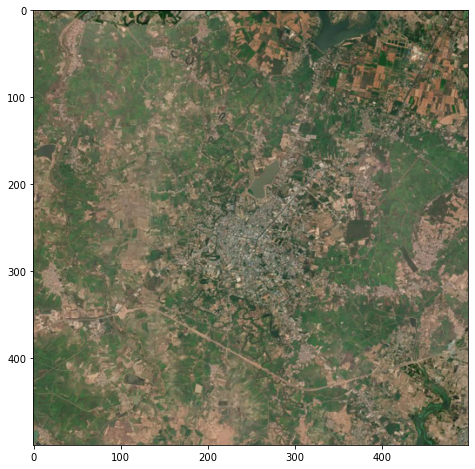

In [55]:
# FUNZONE: Using the function "Show_instance" to test whether the images were processed successfully
show_instance(3500)

## B. Preprocessing target feature(s)

Transforming the two relevant target features into numpy arrays and also saving them as npy files

In [58]:
target_HDI = np.array(data["target_HDI"])
np.save("../data/ignore/target_HDI", target_HDI)

target_logGDP = np.array(data["target_LogGDP"])
np.save("../data/ignore/target_logGDP", target_logGDP)

## C. Towards VGG16

This code is meant to be ran only google colab or any alternative higher-performance pltform.

In [ ]:
#######################################################
# CONTROL PANEL
#######################################################

target_var = "hdi" # either ("hdi" or "gdp")

In [ ]:
# Loading X and Y

features = np.load("../data/ignore/imageset_500_500") # adjust for colab

if target_var == 'hdi':
    labels = np.load("../data/ignore/target_HDI") # adjust for colab
    
elif target_var == 'gdp'
    labels = np.load("../data/ignore/target_logGDP") # adjust for colab

In [ ]:
# Split 60% 20% 20%

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.4, random_state=1945, stratify=labels)

# Further split the training set into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=1945, stratify=y_test)

In [ ]:
# Float conversion to allow normalization
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

# Normalization 
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

In [ ]:
# Convert the numerical labels to one-hot encoded format (NOT TESTED - MAY NOT WORK)
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val_onehot = keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=num_classes)

In [56]:
from PIL import Image

from keras import layers, models
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.regularizers import l2

from skimage import io, color

from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU

import glob
import json
import keras
import keras.backend as K
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import random
import tensorflow as tf
import urllib.request

VGG16 from Deep Learning

In [ ]:
# Import VGG16
vgg_model = VGG16(include_top=False, input_shape=(500, 500, 3))

# Freezing VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

## adding "custom" layers

## Flatten layer
flat_1 = layers.Flatten()(vgg_model.layers[-1].output)

## Dense layers
dense_1 = layers.Dense(32, activation='relu')(flat_1)

#output layer with softmax 
output = layers.Dense(4, activation='softmax')(dense_1)

# define new model
tl_model = Model(inputs=vgg_model.inputs, outputs=output)

# summarize
tl_model.summary()
 
# compile model
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

# fit model
tl_trained = tl_model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), batch_size=64 ,epochs=10, verbose=1)